# 📌 Necessary Libraries
### Import essential libraries for data processing, image handling, and deep learning


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout , MaxPooling2D

### 📌 **Loading and Preprocessing the Dataset**  
#### 🚦 **Traffic Sign Classification Dataset Preparation**  
✅ **Dataset Overview:**  
- The dataset contains **43 classes**, each representing a different **traffic sign**.  
- Images are stored in **separate folders**, where each folder corresponds to a class label.  

✅ **Preprocessing Steps:**  
1️⃣ **Load images** from each class folder.  
2️⃣ **Resize images** to **30x30 pixels** for consistency.  
3️⃣ **Convert images to NumPy arrays** for deep learning compatibility.  
4️⃣ **Store images in `data`** and their corresponding **labels in `labels`**.  

✅ **Purpose of Preprocessing:**  
- Ensures **uniform image dimensions** for model input.  
- Converts data into a structured format for training.  
- Prepares the dataset for **deep learning models** like CNNs.


In [3]:

data = []
labels = []
path_train = r'C:\Users\dellg15\Documents\traffic project\Dataset\train'
classes = 43


for i in range(classes):

    path = os.path.join(path_train, str(i))

    images = os.listdir(path)
    

    for img in images:

        image = Image.open(os.path.join(path, img))

        image = image.resize((30, 30))
 
        image = np.array(image)

        data.append(image)
     
        labels.append(i)


data = np.array(data)
labels = np.array(labels)


print("Shape of data:", data.shape)
print("Shape of labels:", labels.shape)

    

Shape of data: (34776, 30, 30, 3)
Shape of labels: (34776,)


# 📌 Splitting the Dataset into Training and Testing Sets
🔹 Why Split the Data?
✅ To evaluate the model’s performance on unseen data.
✅ Ensures the model generalizes well and doesn’t just memorize the training examples.

🔹 How the Data is Split?
1️⃣ 80% of the dataset is used for training (X_train, y_train).
2️⃣ 20% of the dataset is reserved for testing (X_test, y_test).
3️⃣ shuffle=True ensures data is randomly shuffled before splitting.
4️⃣ random_state=44 ensures reproducibility (same split every time).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size=0.2, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (27820, 30, 30, 3)
X_test shape is  (6956, 30, 30, 3)
y_train shape is  (27820,)
y_test shape is  (6956,)



### 1️⃣ Selects 5 random indices from X_train.
### 2️⃣ Creates a figure with 5 subplots to display the images.
### 3️⃣ Loops through selected indices and plots the corresponding images.
### 4️⃣ Hides axes for a cleaner look.
### 5️⃣ Displays the images using plt.show().

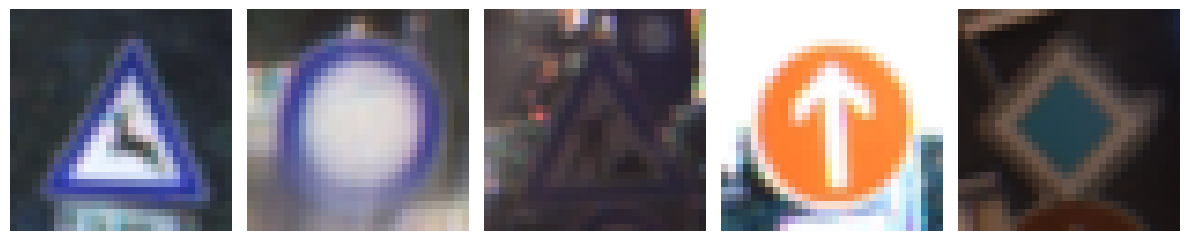

In [5]:
random_indices = np.random.choice(len(X_train), 5, replace=False)
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i, idx in enumerate(random_indices):
    axes[i].imshow(X_train[idx])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## 📌 One-Hot Encoding the Labels
### 🎯 Why Use One-Hot Encoding?
### ✅ Machine learning models don't understand categorical labels (e.g., 0, 1, 2, ...).
### ✅ One-hot encoding converts labels into a numerical format suitable for deep learning models.
### ✅ Ensures that the model doesn't assign an ordinal relationship between classes.

In [6]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [7]:
X_train.shape

(27820, 30, 30, 3)

# 📌 Building the CNN Model for Traffic Sign Classification
🎯 Why Use a Convolutional Neural Network (CNN)?
✅ CNNs are designed to process image data efficiently.
✅ They extract important features (edges, shapes, textures) automatically.
✅ Reduce the number of parameters compared to fully connected networks.

# 📌 CNN Architecture Breakdown
1️⃣ First Convolutional Layer

32 filters, 3x3 kernel, ReLU activation (extracts low-level features).
input_shape=X_train.shape[1:] → accepts images of the same shape as training data.
2️⃣ Second Convolutional Layer

64 filters, 3x3 kernel, ReLU activation (extracts deeper features).
3️⃣ Max Pooling Layer

2x2 pooling to reduce spatial dimensions, preventing overfitting.
4️⃣ Dropout Layer (0.2 rate)

Drops 20% of neurons randomly to prevent overfitting.
5️⃣ Third Convolutional Layer

64 filters, larger 5x5 kernel to capture more complex patterns.
6️⃣ Another Max Pooling & Dropout Layer

Again, to reduce feature map size and avoid overfitting.
7️⃣ Flattening Layer

Converts feature maps into a 1D vector for dense layers.
8️⃣ Fully Connected Dense Layers

Two dense layers (64 neurons each, ReLU activation) for learning patterns.
9️⃣ Output Layer

43 neurons (one per class) with softmax activation for multi-class classification.


In [8]:

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(43, activation='softmax'))

c:\Users\dellg15\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Display model architecture

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,411 (759.42 KB)

 Trainable params: 194,411 (759.42 KB)

 Non-trainable params: 0 (0.00 B)

# 🔹 Explanation of compile() Parameters
1️⃣ loss='categorical_crossentropy'

This is used for multi-class classification (43 classes).
It measures the difference between the actual and predicted probabilities.

2️⃣ optimizer='adam'
Adam is an adaptive optimizer that combines Momentum and RMSProp.
It efficiently updates weights, making learning faster and more stable.

3️⃣ metrics=['accuracy']
Tracks model accuracy during training.
Helps in evaluating how well the model is performing.

✅ 📌 The model is now ready for training! 🚀

In [ ]:
epochs = 15

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## 📌 Training the Model with model.fit()
The model is now being trained using the training dataset (X_train, y_train) and validated on the test dataset (X_test, y_test).

## 🔹 Explanation of Parameters
1️⃣ X_train, y_train → Training data and labels.

2️⃣ batch_size=32 → The model updates weights after processing 32 images at a time.

3️⃣ epochs=epochs → The number of training cycles (15 in this case).

4️⃣ validation_data=(X_test, y_test) → Validates the model’s performance on unseen data after each epoch.

## 📌 What Happens During Training?
✅ The model learns patterns from the training dataset.

✅ The loss (categorical_crossentropy) and accuracy (accuracy) are monitored during training.

✅ The validation data helps detect overfitting (when the model memorizes instead of generalizing).


In [11]:

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
870/870 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.4359 - loss: 2.4132 - val_accuracy: 0.9507 - val_loss: 0.1978
Epoch 2/15
870/870 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.9307 - loss: 0.2622 - val_accuracy: 0.9780 - val_loss: 0.0941
Epoch 3/15
870/870 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9615 - loss: 0.1515 - val_accuracy: 0.9873 - val_loss: 0.0679
Epoch 4/15
870/870 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9669 - loss: 0.1216 - val_accuracy: 0.9898 - val_loss: 0.0455
Epoch 5/15
870/870 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9678 - loss: 0.1242 - val_accuracy: 0.9829 - val_loss: 0.0720
Epoch 6/15
870/870 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.9761 - loss: 0.0959 - val_accuracy: 0.9888 - val_loss: 0.0492
Epoch 7/15
870/870 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9780 - loss: 0.0932 - val_accuracy: 0.9914 - val_loss: 0.0472
Epoch 8/15
870/870 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.9784 - loss: 0.0933 - 

## 📌 Evaluating the Model on Test Data
Now that the model is trained, we evaluate its performance on unseen test data.


## 🔹 Explanation of model.evaluate() Parameters
1️⃣ X_test, y_test → The test dataset used for evaluation.

2️⃣ verbose=1 → Displays progress during evaluation.

3️⃣ Returns:

**test_loss**: The final loss value on test data.

**test_accuracy**: The classification accuracy on test data.

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")


218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9890 - loss: 0.0720
Test Accuracy: 0.99


## 📌 Plotting Training vs Validation Accuracy
This code helps visualize how well the model is learning over time.

## 🔹 What This Does?
✅ Tracks model performance over training epochs.

✅ Compares training accuracy vs validation accuracy to detect overfitting.

✅ A large gap between curves → Indicates the model is memorizing training data instead of generalizing.

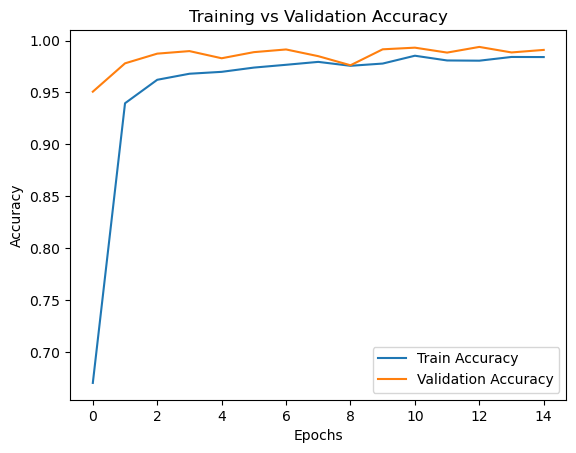

In [ ]:
import matplotlib.pyplot as plt



plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


## 📌 Plotting Training vs Validation Loss
This code visualizes the loss function over training epochs to check for overfitting.

## 🔹 What This Does?
✅ Tracks the model’s loss over time.

✅ Loss should ideally decrease for both training and validation.

✅ Signs of overfitting:

### If training loss decreases while validation loss increases, the model is memorizing training data instead of learning patterns.

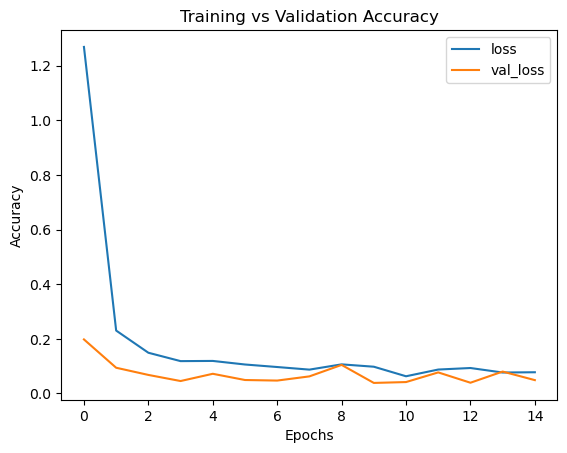

In [ ]:
import matplotlib.pyplot as plt



plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


## 📌 Plotting the Confusion Matrix
This code helps analyze which classes the model misclassified and by how much.

## 🔹 What Does This Do?
✅ Shows model performance across different classes (traffic signs).

✅ Darker diagonal values → Good classification (correct predictions).

✅ Off-diagonal values → Misclassified examples (errors).



218/218 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


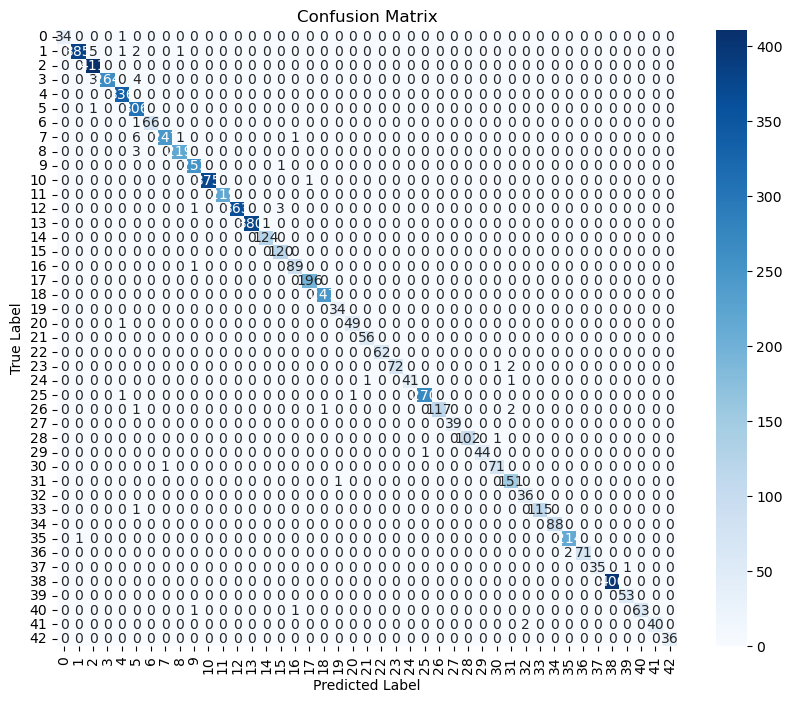

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## 🚀Model Performance Analysis
"""
- The model appears to perform well since most values are concentrated along the diagonal of the confusion matrix, 
  indicating that most classifications are correct.
- Some misclassifications exist, but they are minimal compared to the correct predictions, suggesting high accuracy.
- The classification report shows an overall accuracy of 0.99, with precision, recall, and F1-score close to 1.00 for most classes.
- Certain classes (e.g., 19 and 20) have slightly lower scores, indicating potential areas for improvement.
"""


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       1.00      0.98      0.99       394
           2       0.98      1.00      0.99       411
           3       1.00      0.97      0.99       271
           4       0.99      1.00      0.99       336
           5       0.94      1.00      0.97       307
           6       1.00      0.99      0.99        67
           7       1.00      0.97      0.98       255
           8       0.99      0.99      0.99       222
           9       0.99      1.00      0.99       254
          10       1.00      1.00      1.00       376
          11       1.00      1.00      1.00       219
          12       1.00      0.99      0.99       367
          13       1.00      1.00      1.00       381
          14       0.99      1.00      1.00       124
          15       0.97      1.00      0.98       120
          16       0.98      0.99      0.98        90
          17       0.99    

### 📌 Saving the Trained Model
This line saves the trained model so you can reload and use it later without retraining.
### 🔹 Why Save the Model?
✅ Allows you to reuse the trained model without training again.

✅ Useful for deployment in real-world applications.

✅ Saves both architecture & learned weights.

In [17]:
model.save("my_model.h5")

📌 **Model Classification Report Analysis:**  
The report displays performance metrics such as **Precision**, **Recall**, and **F1-score** for each class.  

✅ **Key Observations:**  

* **Overall accuracy:** **0.99**, indicating that the model classifies the data with very high accuracy.  
* **Precision, recall, and F1-score are close to 1.00 for most classes**, showing strong performance across all categories.  
* Some classes, such as **class 19 and 20**, have slightly lower scores, suggesting potential misclassifications.  

📌 **Overall, the model performs exceptionally well but may need improvement for classes with lower precision or recall values.** 🚀